In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale,RobustScaler,StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
import sklearn.metrics as metrics
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import ParameterGrid

In [2]:
raw = pd.read_csv('cleaned.csv')
raw.head()

,title,runtime,imdb_score,imdb_votes,user_review_count,critic_review_count,critic_overall_score,critic_positive_score,critic_mixed_score,critic_negative_score,user_overall_score,user_positive_score,user_mixed_score,user_negative_score,#_of_nominations,#_of_wins
0,10,122.0,6.1,17623.0,82.0,51.0,68.0,4.0,1.0,2.0,5.8,3.0,2.0,1.0,2,0
1,12,159.0,7.6,14601.0,42.0,71.0,72.0,12.0,5.0,0.0,7.4,17.0,1.0,3.0,1,0
2,12 Angry Men,96.0,9.0,759612.0,1900.0,150.0,96.0,10.0,0.0,0.0,9.0,484.0,9.0,22.0,3,0
3,12 Monkeys,129.0,8.0,606901.0,722.0,197.0,74.0,16.0,4.0,0.0,8.7,453.0,30.0,12.0,2,0
4,127 Hours,94.0,7.6,369917.0,533.0,453.0,82.0,37.0,1.0,0.0,8.1,621.0,65.0,25.0,6,0


In [3]:
row_count, column_count = raw.shape
row_count

1336

In [4]:
# changing the 'title' as ids
le = preprocessing.LabelEncoder()
titles = list(raw['title'])
le.fit(titles)
encoded_titles = le.transform(titles)
raw['title'] = encoded_titles

In [5]:
# example of a normalization

columns = ['title','runtime', 'imdb_score', 'imdb_votes', 'user_review_count', 'critic_review_count','critic_overall_score','critic_positive_score','critic_mixed_score','critic_negative_score','user_overall_score','user_positive_score','user_mixed_score','user_negative_score','#_of_nominations','#_of_wins']



In [6]:
# convert numerical-object to numericals
for col in columns:
    raw[col] = raw[col].replace('[^.0-9]', '', regex=True,).astype(float).fillna(0.0)

    

In [7]:
# convert numerical-object to numericals
for col in columns:
    raw[col] = raw[col].replace('[^.0-9]', '', regex=True,).astype(float).fillna(0.0)

  

In [8]:
# clean textual classes
for col in raw.select_dtypes(include='object').columns:
        raw[col] = raw[col].str.upper().replace('Z_','',regex=True).replace('[^A-Z]','',regex=True)


In [9]:
data_types = {f:t for f,t in zip(raw.columns,raw.dtypes)}

In [10]:
df2 = raw.copy()

In [11]:
data_count = pd.DataFrame(df2.nunique(),columns=['num'],index=None).sort_values('num').reset_index()
data_count.columns = ['name','num']
data_count['type'] = 'numerical'
print(data_count)

                     name   num       type
0               #_of_wins    13  numerical
1        #_of_nominations    19  numerical
2   critic_negative_score    21  numerical
3      critic_mixed_score    30  numerical
4   critic_positive_score    48  numerical
5              imdb_score    52  numerical
6      user_overall_score    61  numerical
7    critic_overall_score    82  numerical
8                 runtime   132  numerical
9        user_mixed_score   136  numerical
10    user_negative_score   139  numerical
11    critic_review_count   351  numerical
12    user_positive_score   415  numerical
13      user_review_count   585  numerical
14             imdb_votes  1330  numerical
15                  title  1336  numerical


In [12]:
# copy df and drop both 'winner' and 'title' since it will not contribute to clustering
df = raw.copy()
df = df.drop(labels=['title'],axis=1)

In [13]:
# counts unique categories of each attribute
data_count = pd.DataFrame(df.nunique(),columns=['num'],index=None).sort_values('num').reset_index()
data_count.columns = ['name','num']
data_count['type'] = 'numerical'
print(data_count)

                     name   num       type
0               #_of_wins    13  numerical
1        #_of_nominations    19  numerical
2   critic_negative_score    21  numerical
3      critic_mixed_score    30  numerical
4   critic_positive_score    48  numerical
5              imdb_score    52  numerical
6      user_overall_score    61  numerical
7    critic_overall_score    82  numerical
8                 runtime   132  numerical
9        user_mixed_score   136  numerical
10    user_negative_score   139  numerical
11    critic_review_count   351  numerical
12    user_positive_score   415  numerical
13      user_review_count   585  numerical
14             imdb_votes  1330  numerical


In [14]:
#sorting the attributes as either nominal or numerical

#data_count.loc[data_count['name'].isin(['category']),'type']='nominal'

nominal_features = list(data_count.loc[data_count['type']=='nominal','name'])
numerical_features = list(data_count.loc[data_count['type']=='numerical','name'])
print(numerical_features)

['#_of_wins', '#_of_nominations', 'critic_negative_score', 'critic_mixed_score', 'critic_positive_score', 'imdb_score', 'user_overall_score', 'critic_overall_score', 'runtime', 'user_mixed_score', 'user_negative_score', 'critic_review_count', 'user_positive_score', 'user_review_count', 'imdb_votes']


In [15]:
df[numerical_features][:2]

,#_of_wins,#_of_nominations,critic_negative_score,critic_mixed_score,critic_positive_score,imdb_score,user_overall_score,critic_overall_score,runtime,user_mixed_score,user_negative_score,critic_review_count,user_positive_score,user_review_count,imdb_votes
0,0.0,2.0,2.0,1.0,4.0,6.1,5.8,68.0,122.0,2.0,1.0,51.0,3.0,82.0,17623.0
1,0.0,1.0,0.0,5.0,12.0,7.6,7.4,72.0,159.0,1.0,3.0,71.0,17.0,42.0,14601.0


In [16]:
# Standard Scaled "mean normalisation" for numerical_data
scaler = StandardScaler()
scaler.fit(df[numerical_features])
print("Feature Means:\t",[f"{x:.2}" for x in scaler.mean_])
numerical_data = scaler.transform(df[numerical_features])
numerical_data = pd.DataFrame(numerical_data,index=df.index,columns=numerical_features)
numerical_data[:2]


Feature Means:	 ['0.78', '3.3', '0.88', '4.2', '1.6e+01', '7.3', '6.4', '7.2e+01', '1.2e+02', '2e+01', '1.7e+01', '1.3e+02', '1.7e+02', '3.8e+02', '1.5e+05']


,#_of_wins,#_of_nominations,critic_negative_score,critic_mixed_score,critic_positive_score,imdb_score,user_overall_score,critic_overall_score,runtime,user_mixed_score,user_negative_score,critic_review_count,user_positive_score,user_review_count,imdb_votes
0,-0.511703,-0.343712,0.567003,-0.791388,-1.129454,-1.935905,-0.203270,-0.273427,0.150831,-0.449119,-0.353952,-0.715387,-0.435875,-0.545212,-0.516956
1,-0.511703,-0.613511,-0.447414,0.183414,-0.366024,0.439817,0.340819,0.005746,1.744482,-0.473696,-0.309058,-0.525224,-0.398392,-0.618384,-0.528386


In [17]:
# using MinMax scale for numerical data

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df[numerical_features])
numerical_data = scaler.transform(df[numerical_features])
numerical_data = pd.DataFrame(numerical_data,index=df.index,columns=numerical_features)
numerical_data[:2]

,#_of_wins,#_of_nominations,critic_negative_score,critic_mixed_score,critic_positive_score,imdb_score,user_overall_score,critic_overall_score,runtime,user_mixed_score,user_negative_score,critic_review_count,user_positive_score,user_review_count,imdb_votes
0,0.0,0.013514,0.086957,0.038462,0.088889,0.392157,0.630435,0.619048,0.408163,0.003650,0.00165,0.068571,0.000516,0.010114,0.006858
1,0.0,0.000000,0.000000,0.192308,0.266667,0.686275,0.804348,0.666667,0.596939,0.001825,0.00495,0.097143,0.002923,0.005113,0.005667


In [18]:
# transformed and scaled dataset
Xy_scaled = pd.concat([numerical_data],axis=1)
print(f'Data min:max {Xy_scaled.min().min(),Xy_scaled.max().max()}')

# original data
Xy_original = df[numerical_features].copy()

Data min:max (0.0, 1.0)


In [19]:
column_names = Xy_scaled.columns.values
column_names.shape

(15,)

In [20]:
# Hyperparameter tuning using the silhouette score method
# Silhouette score values range from 0 to 1.

# candidate values for our cluster
candidate_values = [2, 3, 4, 5, 6, 7, 9, 10, 11, 12]

# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': candidate_values})

Parameter: {'n_clusters': 2} Score 0.42575992843445176
Parameter: {'n_clusters': 3} Score 0.2902664153155387
Parameter: {'n_clusters': 4} Score 0.27597035821860233
Parameter: {'n_clusters': 5} Score 0.2706449374024257
Parameter: {'n_clusters': 6} Score 0.26482273559817227
Parameter: {'n_clusters': 7} Score 0.2644943586581419
Parameter: {'n_clusters': 9} Score 0.2618084581723439
Parameter: {'n_clusters': 10} Score 0.2139606441655049
Parameter: {'n_clusters': 11} Score 0.17734816990485902
Parameter: {'n_clusters': 12} Score 0.17477751083679707


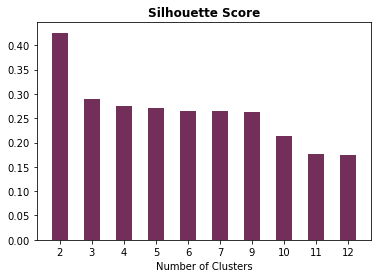

In [21]:
#picking the best K_means model
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []

# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(Xy_scaled)         # fit model on wine dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(Xy_scaled, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(candidate_values))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [22]:
#We will now apply K-Means
# fitting KMeans
optimum_num_clusters = 2
kmeans = KMeans(n_clusters= optimum_num_clusters)
kmeans.fit(Xy_scaled)

KMeans(n_clusters=2)

In [23]:
clustering = kmeans.labels_
clustering.shape

(1336,)

In [24]:
pred = pd.read_csv('test_data.csv')

titles_pred = list(pred['title'])
le.fit(titles_pred)
titles_pred = le.transform(titles_pred)
pred['title'] = titles_pred


columns_pred = ['title','runtime', 'imdb_score', 'imdb_votes', 'user_review_count', 'critic_review_count','critic_overall_score','critic_positive_score','critic_mixed_score','critic_negative_score','user_overall_score','user_positive_score','user_mixed_score','user_negative_score','#_of_nominations','#_of_wins']


    
for col in columns_pred:
    pred[col] = pred[col].replace('[^.0-9]', '', regex=True,).astype(float).fillna(0.0)

    

for col in pred.select_dtypes(include='object').columns:
        pred[col] = pred[col].str.upper().replace('Z_','',regex=True).replace('[^A-Z]','',regex=True)

dp = pred.copy()
dp = dp.drop(labels=['title'],axis=1)

#print(data_count)
data_count_dp = pd.DataFrame(dp.nunique(),columns=['num'],index=None).sort_values('num').reset_index()
data_count_dp.columns = ['name','num']
data_count_dp['type'] = 'numerical'

#data_count_dp.loc[data_count_dp['name'].isin(['category']),'type']='nominal'

nominal_features_dp = list(data_count_dp.loc[data_count_dp['type']=='nominal','name'])
numerical_features_dp = list(data_count_dp.loc[data_count_dp['type']=='numerical','name'])

scaler_dp = StandardScaler()
scaler_dp.fit(dp[numerical_features_dp])
print("Feature Means:\t",[f"{x:.2}" for x in scaler_dp.mean_])
numerical_data_dp = scaler_dp.transform(dp[numerical_features_dp])
numerical_data_dp = pd.DataFrame(numerical_data_dp,index=dp.index,columns=numerical_features_dp)
numerical_data_dp[:2]

scaler_dp = MinMaxScaler(feature_range=(0,1))
scaler_dp.fit(dp[numerical_features_dp])
numerical_data_dp = scaler_dp.transform(dp[numerical_features_dp])
numerical_data_dp = pd.DataFrame(numerical_data_dp,index=dp.index,columns=numerical_features_dp)


# transformed and scaled dataset
Xy_scaled_dp = pd.concat([numerical_data_dp],axis=1)
print(f'Data min:max {Xy_scaled.min().min(),Xy_scaled.max().max()}')

print(Xy_scaled_dp.shape)
# original data
Xy_original_dp = dp[numerical_features_dp].copy()

column_names_dp = Xy_scaled_dp.columns.values
column_names_dp.shape

Feature Means:	 ['1.7', '1.1', '4.8', '8.0', '4.9', '8.1', '5e+01', '4.1e+01', '7.8e+01', '1.3e+02', '4.2e+05', '1.3e+03', '1.2e+03', '9.1e+01', '8.1e+01']
Data min:max (0.0, 1.0)
(12, 15)


(15,)

In [25]:
kmeans.predict(Xy_scaled_dp)

C:\Users\kjcox\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [26]:
Big = []
for i in range(optimum_num_clusters):
    cluster = []
    for j in range(len(clustering)):
        if clustering[j] == i:
            cluster.append(j)
    Big.append(cluster)

In [32]:
Big = np.asarray(Big)

In [33]:
Big

array([list([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 206, 209, 210, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 2

In [34]:
raw_2 = pd.read_csv('cleaned.csv')
pred_2 = pd.read_csv('test_data.csv')

In [35]:
titles_raw = list(raw_2['title'])
titles_pred = list(pred_2['title'])

In [36]:
Cluster_title = []
for clusters in Big:
    C = []
    for i in clusters:
        C.append(titles_raw[i])
    Cluster_title.append(C)

In [37]:
Big_2 = []
for i in range(len(Cluster_title)):
    Big_2.append(np.squeeze(Cluster_title[i]))

In [38]:
Big_2[1]

array(['42nd Street', 'A Foreign Affair', 'A Little Romance',
       'A Patch of Blue', "A Soldier's Story", 'A Tale of Two Cities',
       'Agnes of God', "Airport '77", 'Alfie', 'America America',
       'Anchors Aweigh', 'Around the World in 80 Days', 'Avalon',
       'Baby Doll', 'Ball of Fire', 'Basic Instinct', 'Beau Geste',
       'Bells Are Ringing', 'Best Friends', 'Blaze', 'Bloodbrothers',
       'Bound for Glory', 'Camelot', 'Captain Blood',
       'Captains Courageous', 'Carmen Jones', 'Carnal Knowledge',
       'Casino Royale', 'Chitty Chitty Bang Bang', 'Cimarron',
       'Comes a Horseman', 'Coming Home', 'Crimes of the Heart', 'Dad',
       'Daisy Miller', 'David Copperfield', 'Detective Story',
       'Doctor Dolittle', 'Donnie Brasco', 'Enchanted April',
       'Endless Love', 'Face to Face', 'Faces', 'Fame',
       'Farewell My Concubine', 'Fat City', 'Father of the Bride',
       'Fly Away Home', 'Flying Down to Rio', 'For All Mankind',
       'For Whom the Bell Tol